### Data preprocessing and cleaning:

In [1]:
#Import libraries
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarabic.araby as ar

In [2]:
#Read raw data
data = pd.read_csv("data/full_dialect_dataset.csv", encoding="utf-8-sig", index_col=0)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3229: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.shape #data shape

(1975109, 3)

In [4]:
data.head() #Sample of data

,id,dialect,text
0,1.175358e+18,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1.175416e+18,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,1.175450e+18,IQ,@KanaanRema مبين من كلامه خليجي
3,1.175471e+18,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,1.175497e+18,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺


In [5]:
#Duplicated rows- This issue happens only on EC2 instance
# but didn't happen locally, on KAggle or Colab!!
#Will investigate later, but for now we'll drop them
data.duplicated().sum()

1516911

In [6]:
#Clean the nulls and duplicates to keep our previously cleaned data
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
print(data.shape)

(458197, 3)


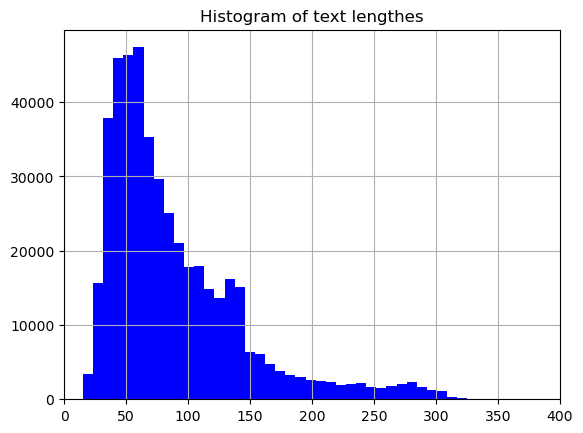

In [7]:
# Check the length of text to understand the data 
# Future work: We may check the correlation between the dialects and the length of text
# Maybe some countries write less than others!!
text_len_hist = data.text.str.len().hist(bins=100,color="blue")
text_len_hist.set_xlim((0,400))
text_len_hist.set_title("Histogram of text lengthes")
plt.show()

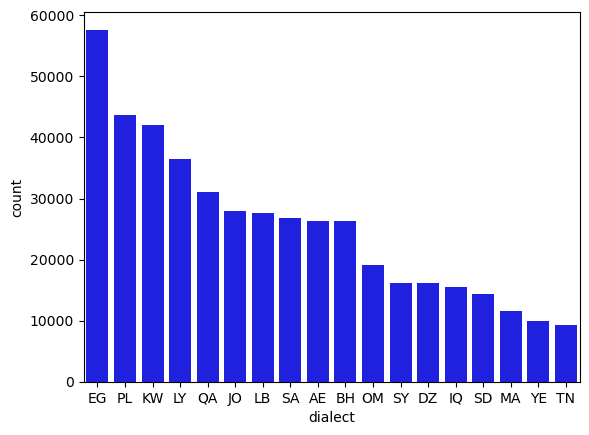

In [8]:
# Let's check the balance of our dataset
sns.countplot(data=data,
              x="dialect",
              color="blue",
              order = data['dialect'].value_counts().index);
plt.show()

It seems that our data is imbalanced where the EG dialect is the most dominant in the dataset and the TN's is the lowest. We need to pay attention if there is a difference of scores based on each dialect. If there is a problem, we may need to handle it.

In [9]:
def clean_data(text):
    '''
    A function to clean Arabic text
    '''
    #Remove emojis, non-Arabic characters and numbers
    text = re.sub('([@A-Za-z0-9]+)|[^\w\s]|#|http\S+', '', text).strip()
    #Remove Tashkeel
    text = ar.strip_tashkeel(text)
    #Remove Tatweel
    text = ar.strip_tatweel(text)
    #Replace Taa Marbota with Haa to avoid some misspellings
    text = text.replace("ة","ه")
    #Replace All Alefs with standard Alef wasl to normalize Alef and Hamza
    text = re.sub('[إأآ]', 'ا', text)
    #Replace All Alf Maksor with Yaa to anormalize it in all writings
    text = re.sub('[ى]', 'ي', text)
    return text

In [10]:
#Clean the text
data["text"] = data["text"].apply(clean_data)

In [11]:
#Save the cleaned dataset to be used in the next step
data.to_csv("data/clean_dialect_dataset.csv", encoding='utf-8-sig')